<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/02_Abalone_KNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

filename = '/content/drive/MyDrive/Data/abalone.data'

In [2]:
# Load data
abalone = pd.read_csv(filename, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.rename(columns={0 : 'Sex', 1 : 'Length', 2 : 'Diameter', 3 : 'Height', 4 : 'Whole weight', 5 : 'Shucked weight', 6 : 'Viscera weight', 7 : 'Shell weight', 8 : 'Rings'}, inplace=True)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
# View unique categories
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

1) Is this a balanced data set?

In [6]:
# Determine how balanced the classes are
abalone['Sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

This dataset is actually pretty balanced I would say. 'Male' value is a little bit more popular, but in general there is only slight difference between those three categories.

In [7]:
# Converting string names of the classes to numeric values
abalone['Sex'] = abalone['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

2) Separate your data into the features matrix (X) and target vector (y).

In [8]:
# Arranging data into a features matrix and target vector
y = abalone['Sex']
X = abalone.drop(columns = 'Sex')

In [9]:
y.shape

(4177,)

In [10]:
X.shape

(4177, 8)

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

2) Be sure to scale your data (try using the pipeline!)

In [15]:
# Scaling data and appliyng the KNN model
pipe_k1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))

In [16]:
# Fit the model on your training data
pipe_k1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [17]:
# Predict the values for the test set
predictions = pipe_k1.predict(X_test)
predictions

array([1, 2, 0, ..., 1, 2, 2])

3) What is the accuracy of your default model?

In [18]:
# Calculate classification accuracycopy
train_score = pipe_k1.score(X_train, y_train)
test_score = pipe_k1.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.5014354066985646


This model with K=1 did really good on training (100%), but pretty bad on testing(50%). Let's try finding better value for the number of neighbors. 

4) What is the optimal accuracy you can achieve by tuning the value of K using KNN?

Minimum error:- 0.4229665071770335 at K = 33


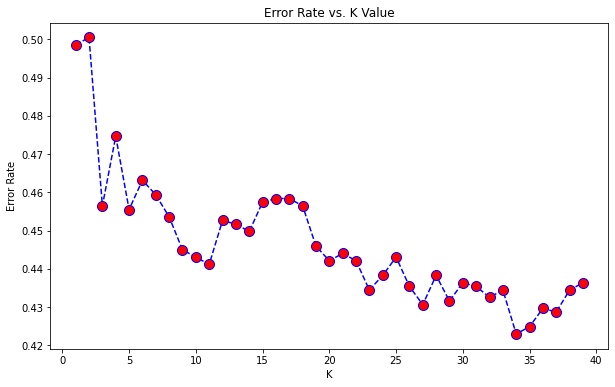

In [19]:
# Find out the optimal k value (from https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)
error_rate = []
for i in range(1,40):
 pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
 pipe.fit(X_train, y_train)
 pred_i = pipe.predict(X_test) 
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the plot we can see, that the smalest error we got is 42.2 at K = 33. Let's try using K = 33.

Maximum accuracy:- 0.5770334928229665 at K = 33


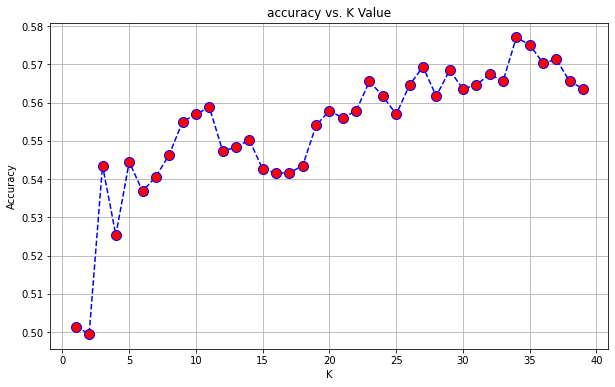

In [20]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i)).fit(X_train,y_train)
    predictions = pipe.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, predictions))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.grid()
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

We got the accuracy of 0.57 at K=33

{'kneighborsclassifier__n_neighbors': 20}

In [21]:
# Scaling data and appliyng the KNN model with K = 33
pipe_k33 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 33))

In [22]:
# Fit the model on your training data
pipe_k33.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=33, p=2,
                                      weights='uniform'))],
         verbose=False)

In [23]:
# Calculate classification accuracy
train_score = pipe_k33.score(X_train, y_train)
test_score = pipe_k33.score(X_test, y_test)
print(train_score)
print(test_score)

0.5900383141762452
0.5655502392344498


We reached the highest test score using K = 33. However train score decreased, which brought train and test score closer to each other. We can cosider this as an optimal KNN model.

In [37]:
# Easier way using GridSearchCV
knn_params = {'kneighborsclassifier__n_neighbors' : [1, 5, 20, 25, 30, 33, 40]}
grid = GridSearchCV(pipe, knn_params)
grid.fit(X_train, y_train)
# Check the optimal combinations of hyperparameters
grid.best_params_

{'kneighborsclassifier__n_neighbors': 20}

In [38]:
# Trying k = 20
pipe_k20 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 20)).fit(X_train, y_train)
train_score = pipe_k20.score(X_train, y_train)
test_score = pipe_k20.score(X_test, y_test)
print(train_score)
print(test_score)


0.60727969348659
0.5578947368421052


This one actually gave as slightly worse result by 1% on test score.

5) Create a confusion matrix for you optimal KNN model.

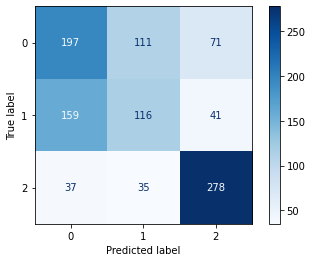

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_k33, X_test, y_test, cmap = 'Blues', values_format='.0f', );

Per plot above:
This shows a total of 1045 predictions.

*   197 True Negatives
*   116 True Positives
*   278 True Positives

To find accuracy dividing correct predictions by total predictions and multiply by 100 to get a percent:
591/1045=0.56 -> 56.5%

56.5% is the same percetage as we see in test score, so canculation is correct.



